<a href="https://colab.research.google.com/github/aakanshadalmia/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection
-------------------------

**Problem Statement:** The challenge is for credit card companies to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
 
**Goal:** This project is aimed at finding a classification model with the best performance for an imbalanced dataset.

**Evaluation Metrics Used:** AUC-ROC Curve

**To be Explored**:
- Hyperparamter tuning

- PCA

- Decision tree Visualization


## About the Dataset
---------

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is **highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.**

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features and more background information about the data has been omitted.

Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 

**Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

_Given the class imbalance ratio, Area Under the Precision-Recall Curve (AUPRC) has been used for evaluation instead of using a Confusion matrix to determine accuracy for the unbalanced classification._

In [2]:
#Import all required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Reading data from csv file into a dataframe

data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.isna().sum()
data = data.fillna(0)

In [7]:
#Estimating the imbalance in the dataset

print("Total number of transactions:", len(data))
normal = len(data[data.Class == 0])
fraud = len(data[data.Class == 1])
print("Legitimate Transactions:", normal)
print("Fraud Transactions:", fraud)
print("% of Fraud Transactions:", round(fraud / len(data) * 100,4))

Total number of transactions: 284807
Legitimate Transactions: 284315
Fraud Transactions: 492
% of Fraud Transactions: 0.1727


In [8]:
#Defining the training and testing datasets

X = data.drop('Class',axis = 1)
Y = data.Class.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

# Principal Component Analysis

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
pca = PCA(n_components = 10).fit(X_train_scaled)

In [11]:
X_train_pca = pca.transform(X_train_scaled)
X_train_pca.shape

(199364, 10)

In [12]:
X_test_pca = pca.transform(X_test_scaled)

## K-Nearest Neighbours

In [13]:
#Model Building

kNN = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1, leaf_size = 600)
kNN.fit(X_train_pca, Y_train)

#Applying model to test dataset
kNN_Y_pred = kNN.predict(X_test_pca)

In [14]:
#Model Evaluation

kNN_f1 = metrics.f1_score(Y_test,kNN_Y_pred)
print("F1 score for kNN model is:",kNN_f1)

F1 score for kNN model is: 0.7239819004524887


In [15]:
#Hyperparameter Tuning
grid_params = {'n_neighbors' : list(range(3,15,3)),
               'metric' : ['euclidean','manhattan']}

gridsearch_kNN = GridSearchCV(KNeighborsClassifier(), grid_params, cv = 3, scoring = 'f1', n_jobs = -1, verbose = 10)
gridsearch_kNN.fit(X_train_pca, Y_train)
gridsearch_kNN

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 6, 9, 12]},
             scoring='f1', verbose=10)

In [16]:
print("Best possible Cross Validation score:",gridsearch_kNN.best_score_)

Best possible Cross Validation score: 0.7674746856128912


In [17]:
gridsearch_kNN.best_params_

{'metric': 'euclidean', 'n_neighbors': 3}

In [18]:
kNN_tuned = KNeighborsClassifier(gridsearch_kNN.best_params_['n_neighbors'], metric = gridsearch_kNN.best_params_['metric'])
kNN_tuned.fit(X_train_pca,Y_train)
kNN_tuned_Y_pred = kNN_tuned.predict(X_test_pca)

In [19]:
#Model Evaluation

kNN_best_f1 = metrics.f1_score(Y_test,kNN_tuned_Y_pred)
print("F1 score for kNN model after hyperparameter tuning is:",kNN_best_f1)

F1 score for kNN model after hyperparameter tuning is: 0.7454545454545455


## Logistic Regression

In [20]:
#Model Building

log_reg = LogisticRegression(verbose = 2, n_jobs = -1)
log_reg.fit(X_train_pca, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished


LogisticRegression(n_jobs=-1, verbose=2)

In [21]:
#Applying model to test dataset

LR_Y_pred = log_reg.predict(X_test_pca)

In [22]:
#Model Evaluation

logr_f1 = metrics.f1_score(Y_test,LR_Y_pred)
print("F1 score for Logistic Regression model is:",logr_f1)

F1 score for Logistic Regression model is: 0.5427135678391961


In [23]:
#Hyperparameter Tuning

w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
crange = np.arange(0.5, 20.0, 0.5)
param_grid = {"class_weight": w}

gridsearch_logr = GridSearchCV(LogisticRegression(max_iter = 500), param_grid, cv = 3, scoring = 'f1', n_jobs = -1)
gridsearch_logr.fit(X_train_pca,Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'class_weight': [{0: 1000, 1: 100}, {0: 1000, 1: 10},
                                          {0: 1000, 1: 1.0}, {0: 500, 1: 1.0},
                                          {0: 400, 1: 1.0}, {0: 300, 1: 1.0},
                                          {0: 200, 1: 1.0}, {0: 1.0, 1: 10},
                                          {0: 1.0, 1: 99}, {0: 1.0, 1: 100},
                                          {0: 1.0, 1: 150}, {0: 1.0, 1: 200},
                                          {0: 1.0, 1: 300}, {0: 1.0, 1: 400},
                                          {0: 1.0, 1: 500}, {0: 1.0, 1: 1000},
                                          {0: 10, 1: 1000},
                                          {0: 100, 1: 1000}]},
             scoring='f1')

In [24]:
print("Cross validation score after tuning: ",gridsearch_logr.best_score_)
print("Final parameters after tuning",gridsearch_logr.best_params_)

Cross validation score after tuning:  0.7529077322624754
Final parameters after tuning {'class_weight': {0: 100, 1: 1000}}


In [25]:
logr_tuned = LogisticRegression(class_weight = gridsearch_logr.best_params_['class_weight'], max_iter = 500)
logr_tuned.fit(X_train_pca,Y_train)

logr_tuned_pred = logr_tuned.predict(X_test_pca)

In [26]:
#Model Evaluation

logr_best_f1 = metrics.f1_score(Y_test,logr_tuned_pred)
print("F1 score for Logistic Regression after Hyperparameter tuning is:",logr_best_f1)

F1 score for Logistic Regression after Hyperparameter tuning is: 0.7081712062256809


## Decision Tree

In [27]:
#Model Building

DT = DecisionTreeClassifier(criterion = 'entropy')
DT.fit(X_train_pca,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [28]:
#Applying model to test dataset

DT_Y_pred = DT.predict(X_test_pca)

In [29]:
#Model Evaluation

dt_f1 = metrics.f1_score(Y_test, DT_Y_pred)
print("F1 score for Decision Tree model is:",dt_f1)

F1 score for Decision Tree model is: 0.6415094339622641


In [30]:
#Hyperparameter Tuning

criteria = ['gini', 'entropy']
max_depth = list(range(2,10))
min_samples_leaf = [5,10,15,20]

param_grid = {"criterion" : criteria, "max_depth" : max_depth, "min_samples_leaf" : min_samples_leaf}

gridsearch_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3, scoring = 'f1', n_jobs = -1)
gridsearch_dt.fit(X_train_pca,Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [5, 10, 15, 20]},
             scoring='f1')

In [31]:
print("Cross validation score after tuning: ",gridsearch_dt.best_score_)
print("Final parameters after tuning",gridsearch_dt.best_params_)

Cross validation score after tuning:  0.7831620269976435
Final parameters after tuning {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10}


In [32]:
dt_tuned = DecisionTreeClassifier(criterion = gridsearch_dt.best_params_['criterion'],
                                  max_depth = gridsearch_dt.best_params_['max_depth'],
                                  min_samples_leaf = gridsearch_dt.best_params_['min_samples_leaf'])
dt_tuned.fit(X_train_pca,Y_train)

dt_tuned_pred = dt_tuned.predict(X_test_pca)

In [33]:
#Model Evaluation

dt_best_f1 = metrics.f1_score(Y_test, dt_tuned_pred)
print("F1 score for Decision Tree model is:",dt_best_f1)

F1 score for Decision Tree model is: 0.7272727272727273


## Support Vector Machine

In [34]:
#Model Building
svm = SVC(max_iter=10000)
svm.fit(X_train_pca, Y_train)

SVC(max_iter=10000)

In [35]:
#Applying model to test dataset
svm_Y_pred = svm.predict(X_test_pca)

In [36]:
#Model Evaluation
svm_f1 = metrics.f1_score(Y_test,svm_Y_pred)
print("F1 score for SVM model is:",svm_f1)

F1 score for SVM model is: 0.7368421052631579


In [37]:
#Hyperparameter Tuning
kernel = ['poly', 'rbf', 'linear']

param_grid = {"kernel" : kernel}

gridsearch_svc = GridSearchCV(SVC(max_iter=1000000), param_grid, cv = 3, scoring = 'f1', n_jobs = 1, verbose=2)
gridsearch_svc.fit(X_train_pca,Y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ........................................kernel=poly; total time=   8.5s
[CV] END ........................................kernel=poly; total time=   8.0s
[CV] END ........................................kernel=poly; total time=   6.1s
[CV] END .........................................kernel=rbf; total time=   6.8s
[CV] END .........................................kernel=rbf; total time=   6.8s
[CV] END .........................................kernel=rbf; total time=   6.3s
[CV] END ......................................kernel=linear; total time=   2.6s
[CV] END ......................................kernel=linear; total time=   2.5s
[CV] END ......................................kernel=linear; total time=   2.4s


GridSearchCV(cv=3, estimator=SVC(max_iter=1000000), n_jobs=1,
             param_grid={'kernel': ['poly', 'rbf', 'linear']}, scoring='f1',
             verbose=2)

In [38]:
print("Cross validation score after tuning: ",gridsearch_svc.best_score_)
print("Final parameters after tuning",gridsearch_svc.best_params_)

Cross validation score after tuning:  0.7955404541216899
Final parameters after tuning {'kernel': 'rbf'}


In [39]:
svc_tuned = SVC(kernel = gridsearch_svc.best_params_['kernel'])
svc_tuned.fit(X_train_pca,Y_train)
svc_tuned_pred = svc_tuned.predict(X_test_pca)

In [40]:
#Model Evaluation

svm_best_f1 = metrics.f1_score(Y_test,svc_tuned_pred)
print("F1 score for SVM after hyperparameter tuning is: ",svm_best_f1)

F1 score for SVM after hyperparameter tuning is:  0.7368421052631579


## Random Forest

In [41]:
#Model Building

rf = RandomForestClassifier(n_jobs = -1)
rf.fit(X_train_pca, Y_train)

RandomForestClassifier(n_jobs=-1)

In [42]:
#Applying model to test dataset

rf_Y_pred = rf.predict(X_test_pca)

In [43]:
#Model Evaluation

rf_f1 = metrics.f1_score(Y_test, rf_Y_pred)
print("F1 score for Random Forest model is:",rf_f1)

F1 score for Random Forest model is: 0.7391304347826088


In [70]:
#Hyperparameter tuning 

criteria = ['gini','entropy']
max_depth = [2,10,20]
min_samples_leaf = [5,20]

param_grid = {"criterion" : criteria, "max_depth" : max_depth, "min_samples_leaf" : min_samples_leaf}

grid_search_rf = GridSearchCV(RandomForestClassifier(),param_grid, cv = 3, verbose = 2, n_jobs = -1, scoring = 'f1')
grid_search_rf.fit(X_train_pca,Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 10, 20],
                         'min_samples_leaf': [5, 20]},
             scoring='f1', verbose=2)

In [72]:
print("Cross validation score after tuning: ",grid_search_rf.best_score_)
print("Final parameters after tuning",grid_search_rf.best_params_)

Cross validation score after tuning:  0.7809101107155051
Final parameters after tuning {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}


In [73]:
#Fitting Random Forest with the best parameters and making a prediction on test data set

rf_tuned = RandomForestClassifier(criterion = grid_search_rf.best_params_['criterion'],
                                  max_depth = grid_search_rf.best_params_['max_depth'],
                                  min_samples_leaf = grid_search_rf.best_params_['min_samples_leaf'])
rf_tuned.fit(X_train_pca,Y_train)

rf_tuned_pred = rf_tuned.predict(X_test_pca)

In [74]:
rf_best_f1 = metrics.f1_score(Y_test, rf_tuned_pred)
print("F1 score for Random Forest after hyperparameter tuning is: ",rf_best_f1)

F1 score for Random Forest after hyperparameter tuning is:  0.7456140350877194


## XGBoost

In [48]:
#Model Building

xgb =XGBClassifier()
xgb.fit(X_train_pca, Y_train)

XGBClassifier()

In [49]:
#Applying model to test dataset

xgb_Y_pred = rf.predict(X_test_pca)

In [50]:
#Model Evaluation

xgb_f1 = metrics.f1_score(Y_test, xgb_Y_pred)
print("F1 score for XGBoost model is:",xgb_f1)

F1 score for XGBoost model is: 0.7391304347826088


In [52]:
#Hyperparameter Tuning

param_grid = {'min_child_weight': [1, 5, 10],
              'gamma': [0.5, 1, 1.5, 2, 5],
              'max_depth': [3, 4, 5]
              }

grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid, n_jobs = -1, scoring = "f1", cv = 3, verbose = 2)
grid_search_xgb.fit(X_train_pca,Y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10]},
             scoring='f1', verbose=2)

In [53]:
print("Cross validation score after tuning: ",grid_search_xgb.best_score_)
print("Final parameters after tuning",grid_search_xgb.best_params_)

Cross validation score after tuning:  0.8082571789231805
Final parameters after tuning {'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 5}


In [54]:
#Fitting Random Forest with the best parameters and making a prediction on test data set

xgb_tuned = XGBClassifier(min_child_weight = grid_search_xgb.best_params_['min_child_weight'],
                                  max_depth = grid_search_xgb.best_params_['max_depth'],
                                  gamma = grid_search_xgb.best_params_['gamma'])
xgb_tuned.fit(X_train_pca,Y_train)

xgb_tuned_pred = xgb_tuned.predict(X_test_pca)

In [55]:
xgb_best_f1 = metrics.f1_score(Y_test, xgb_tuned_pred)
print("F1 score for XGBoost after hyperparameter tuning is: ",xgb_best_f1)

F1 score for XGBoost after hyperparameter tuning is:  0.748936170212766


# Comparison of Model Performance

In [75]:
df_perf = pd.DataFrame(data = [['KNN',kNN_f1,kNN_best_f1],
                               ['Logistic Regression',logr_f1,logr_best_f1],
                               ['Decision Tree',dt_f1,dt_best_f1],
                               ['Support Vector Machine',svm_f1,svm_best_f1],
                               ['Random Forest',rf_f1,rf_best_f1],
                               ['XGBoost',xgb_f1,xgb_best_f1]
                               ], columns = ['Model','F1 score before Tuning','F1 score after Tuning'])
                               
df = df_perf.sort_values(by = 'F1 score after Tuning',ascending = False).reset_index(drop = True)
df

,Model,F1 score before Tuning,F1 score after Tuning
0,XGBoost,0.739130,0.748936
1,Random Forest,0.739130,0.745614
2,KNN,0.723982,0.745455
3,Support Vector Machine,0.736842,0.736842
4,Decision Tree,0.641509,0.727273
5,Logistic Regression,0.542714,0.708171


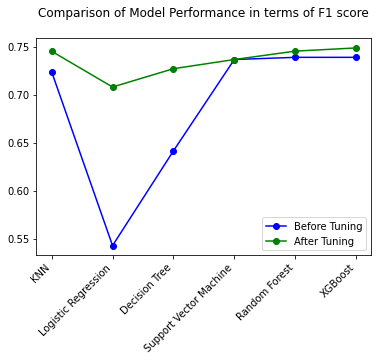

In [ ]:
import matplotlib.pyplot as plt

ax = plt.subplot()

plt.title("Comparison of Model Performance in terms of F1 score\n")

p1 = plt.plot(df_perf['Model'], df_perf['F1 score before Tuning'], marker = "o", c = 'b', label = "Before Tuning")
plt.plot(df_perf['Model'], df_perf['F1 score after Tuning'], marker = "o", c = 'g', label = "After Tuning")

plt.figure(figsize=(400,400))
plt.setp(ax.get_xticklabels(),rotation = 45, ha = 'right')
ax.legend()
plt.grid()

plt.show()